# **Laptop Price Prediction (EDA)**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as pp

%matplotlib inline

In [2]:
data = pd.read_csv('data/Laptop_price.csv')
data.head(10)

Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   
5      HP         1.881348        16               256    11.943958  4.840268   
6  Lenovo         2.940721        32               256    11.713246  4.344846   
7  Lenovo         3.016788         4               256    15.588315  2.941120   
8  Lenovo         2.560327         4               512    15.026332  2.743620   
9    Acer         3.341111        32               512    13.611945  4.093149   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  
5   9543.719980  
6  10390.137319  
7   9214.484506  
8  16372.175284  
9  18501.832733

### **Check Unique Value Each**

In [3]:
profile_data = data.copy()
profile_data['Processor_Speed'] = np.log1p(profile_data['Processor_Speed'])
profile_data['Screen_Size'] = np.log1p(profile_data['Screen_Size'])
profile_data['Weight'] = np.log1p(profile_data['Weight'])
profile_data = pd.get_dummies(profile_data, columns=['Brand'], drop_first=True)

print(profile_data.head(10))
pp.ProfileReport(profile_data)

   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         1.574908        16               512     2.500218  1.292284   
1         1.364262         4              1000     2.510523  1.449272   
2         1.444947         4               256     2.553579  1.108253   
3         1.569917        16               512     2.586286  1.718089   
4         1.451168        32              1000     2.772018  1.647402   
5         1.058258        16               256     2.560629  1.764777   
6         1.371364        32               256     2.542644  1.676133   
7         1.390482         4               256     2.808699  1.371465   
8         1.269852         4               512     2.774233  1.320053   
9         1.468130        32               512     2.681839  1.627896   

          Price  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  
0  17395.093065        True       False     False         False  
1  31607.605919       False       False     False         False 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile_data.dtypes

Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
Brand_Asus             bool
Brand_Dell             bool
Brand_HP               bool
Brand_Lenovo           bool
dtype: object

In [5]:
numerical_col = [feature for feature in profile_data.columns if profile_data[feature].dtype != 'object' and  profile_data[feature].dtype != 'bool']
numerical_col

['Processor_Speed',
 'RAM_Size',
 'Storage_Capacity',
 'Screen_Size',
 'Weight',
 'Price']

## **Data Visualization**

<Figure size 1000x600 with 0 Axes>

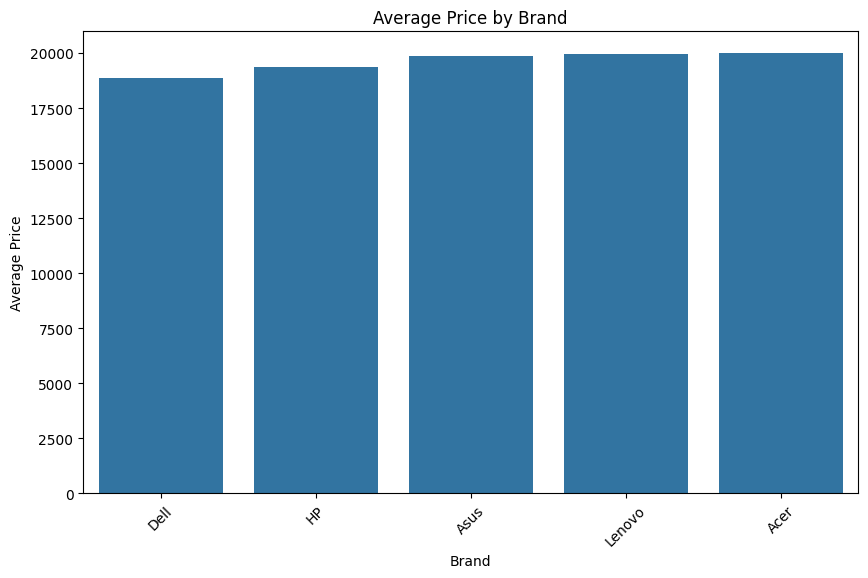

In [6]:
plt.figure(figsize=(10, 6))
brand_price = data.groupby('Brand')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_price.index, y=brand_price.values)
plt.title("Average Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

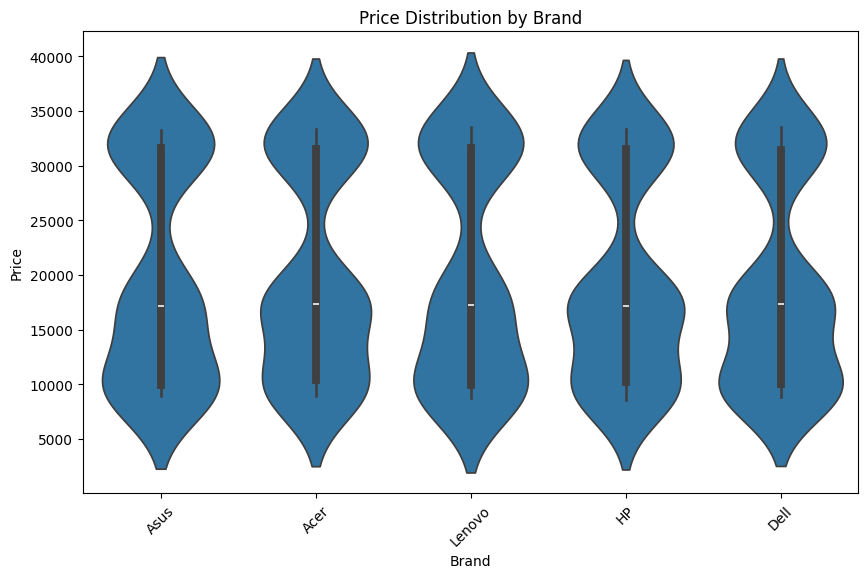

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Brand', y='Price', data=data)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45)
plt.show()

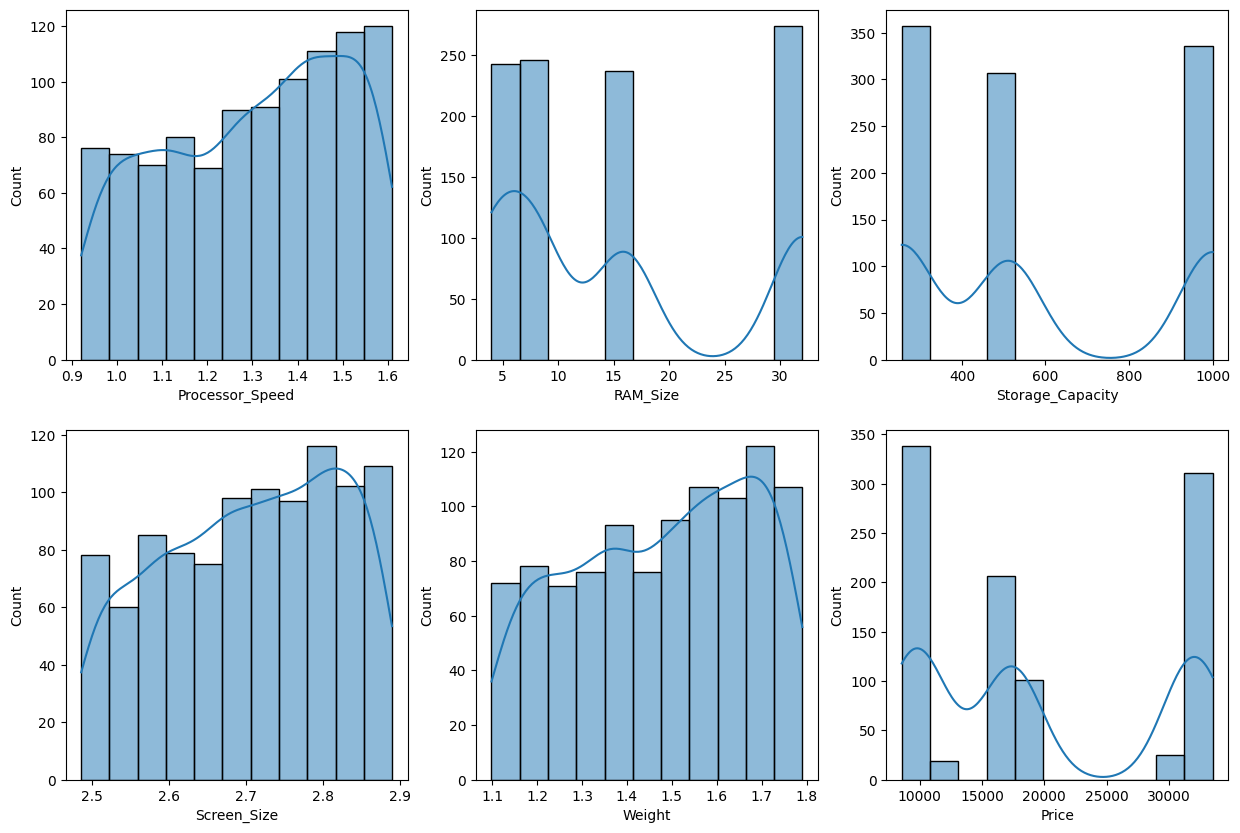

In [8]:
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=profile_data[column], ax=ax, kde=True)
    
plt.show()

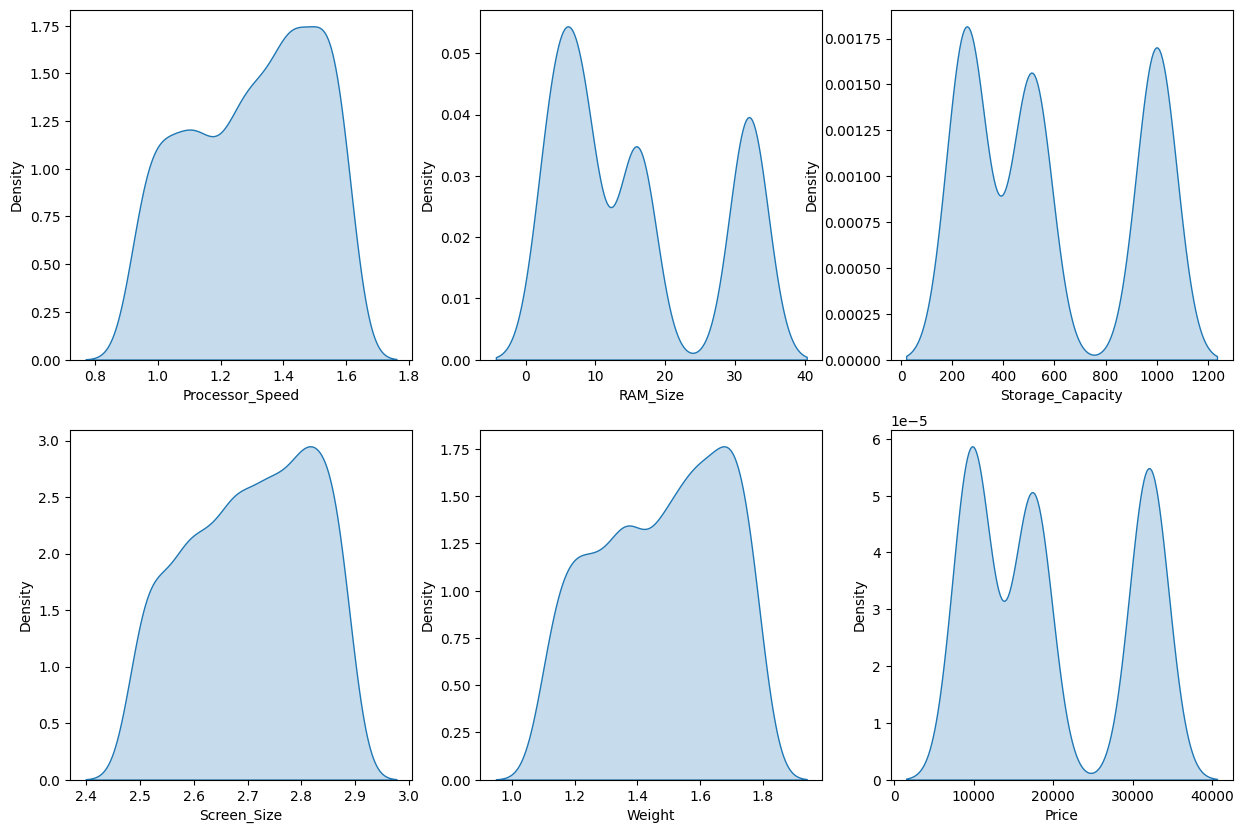

In [9]:
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=profile_data[column], ax=ax, fill=True)
    
plt.show()

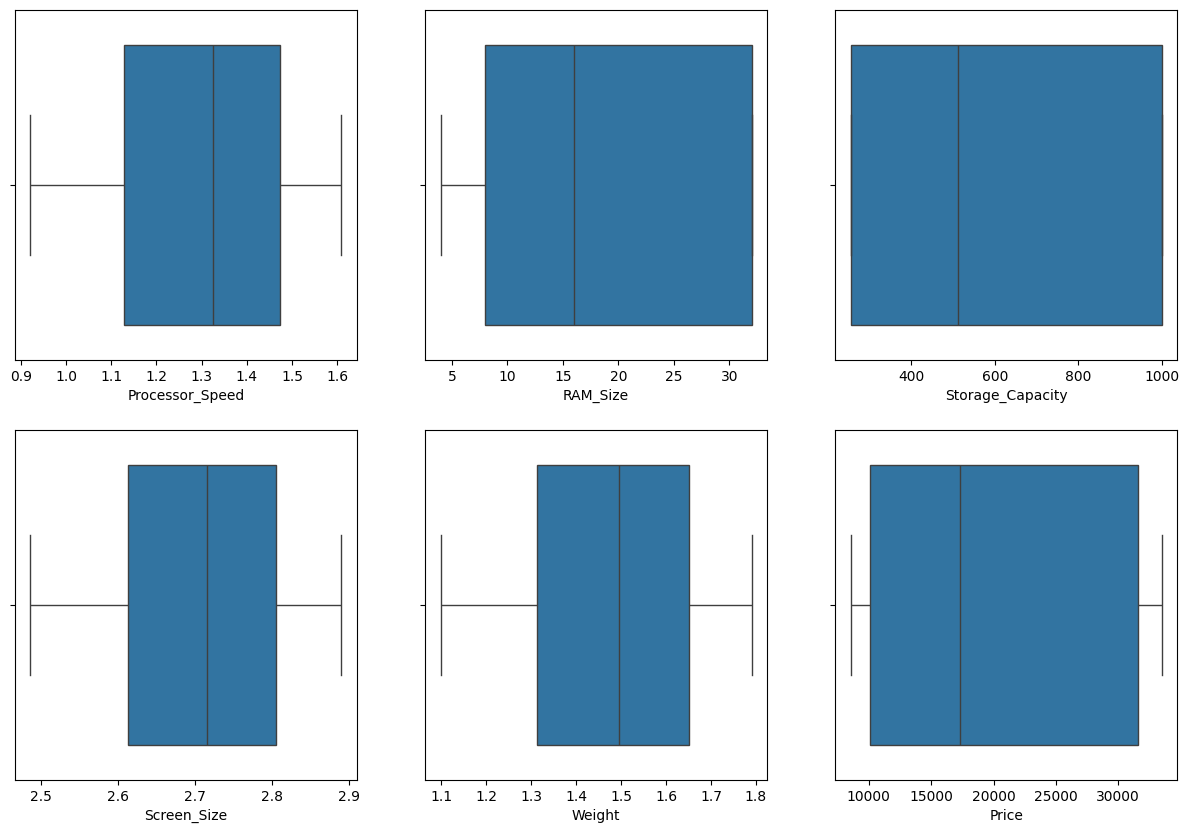

In [10]:
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=profile_data[column], ax=ax)
    ax.set_xlabel(column)

plt.show()

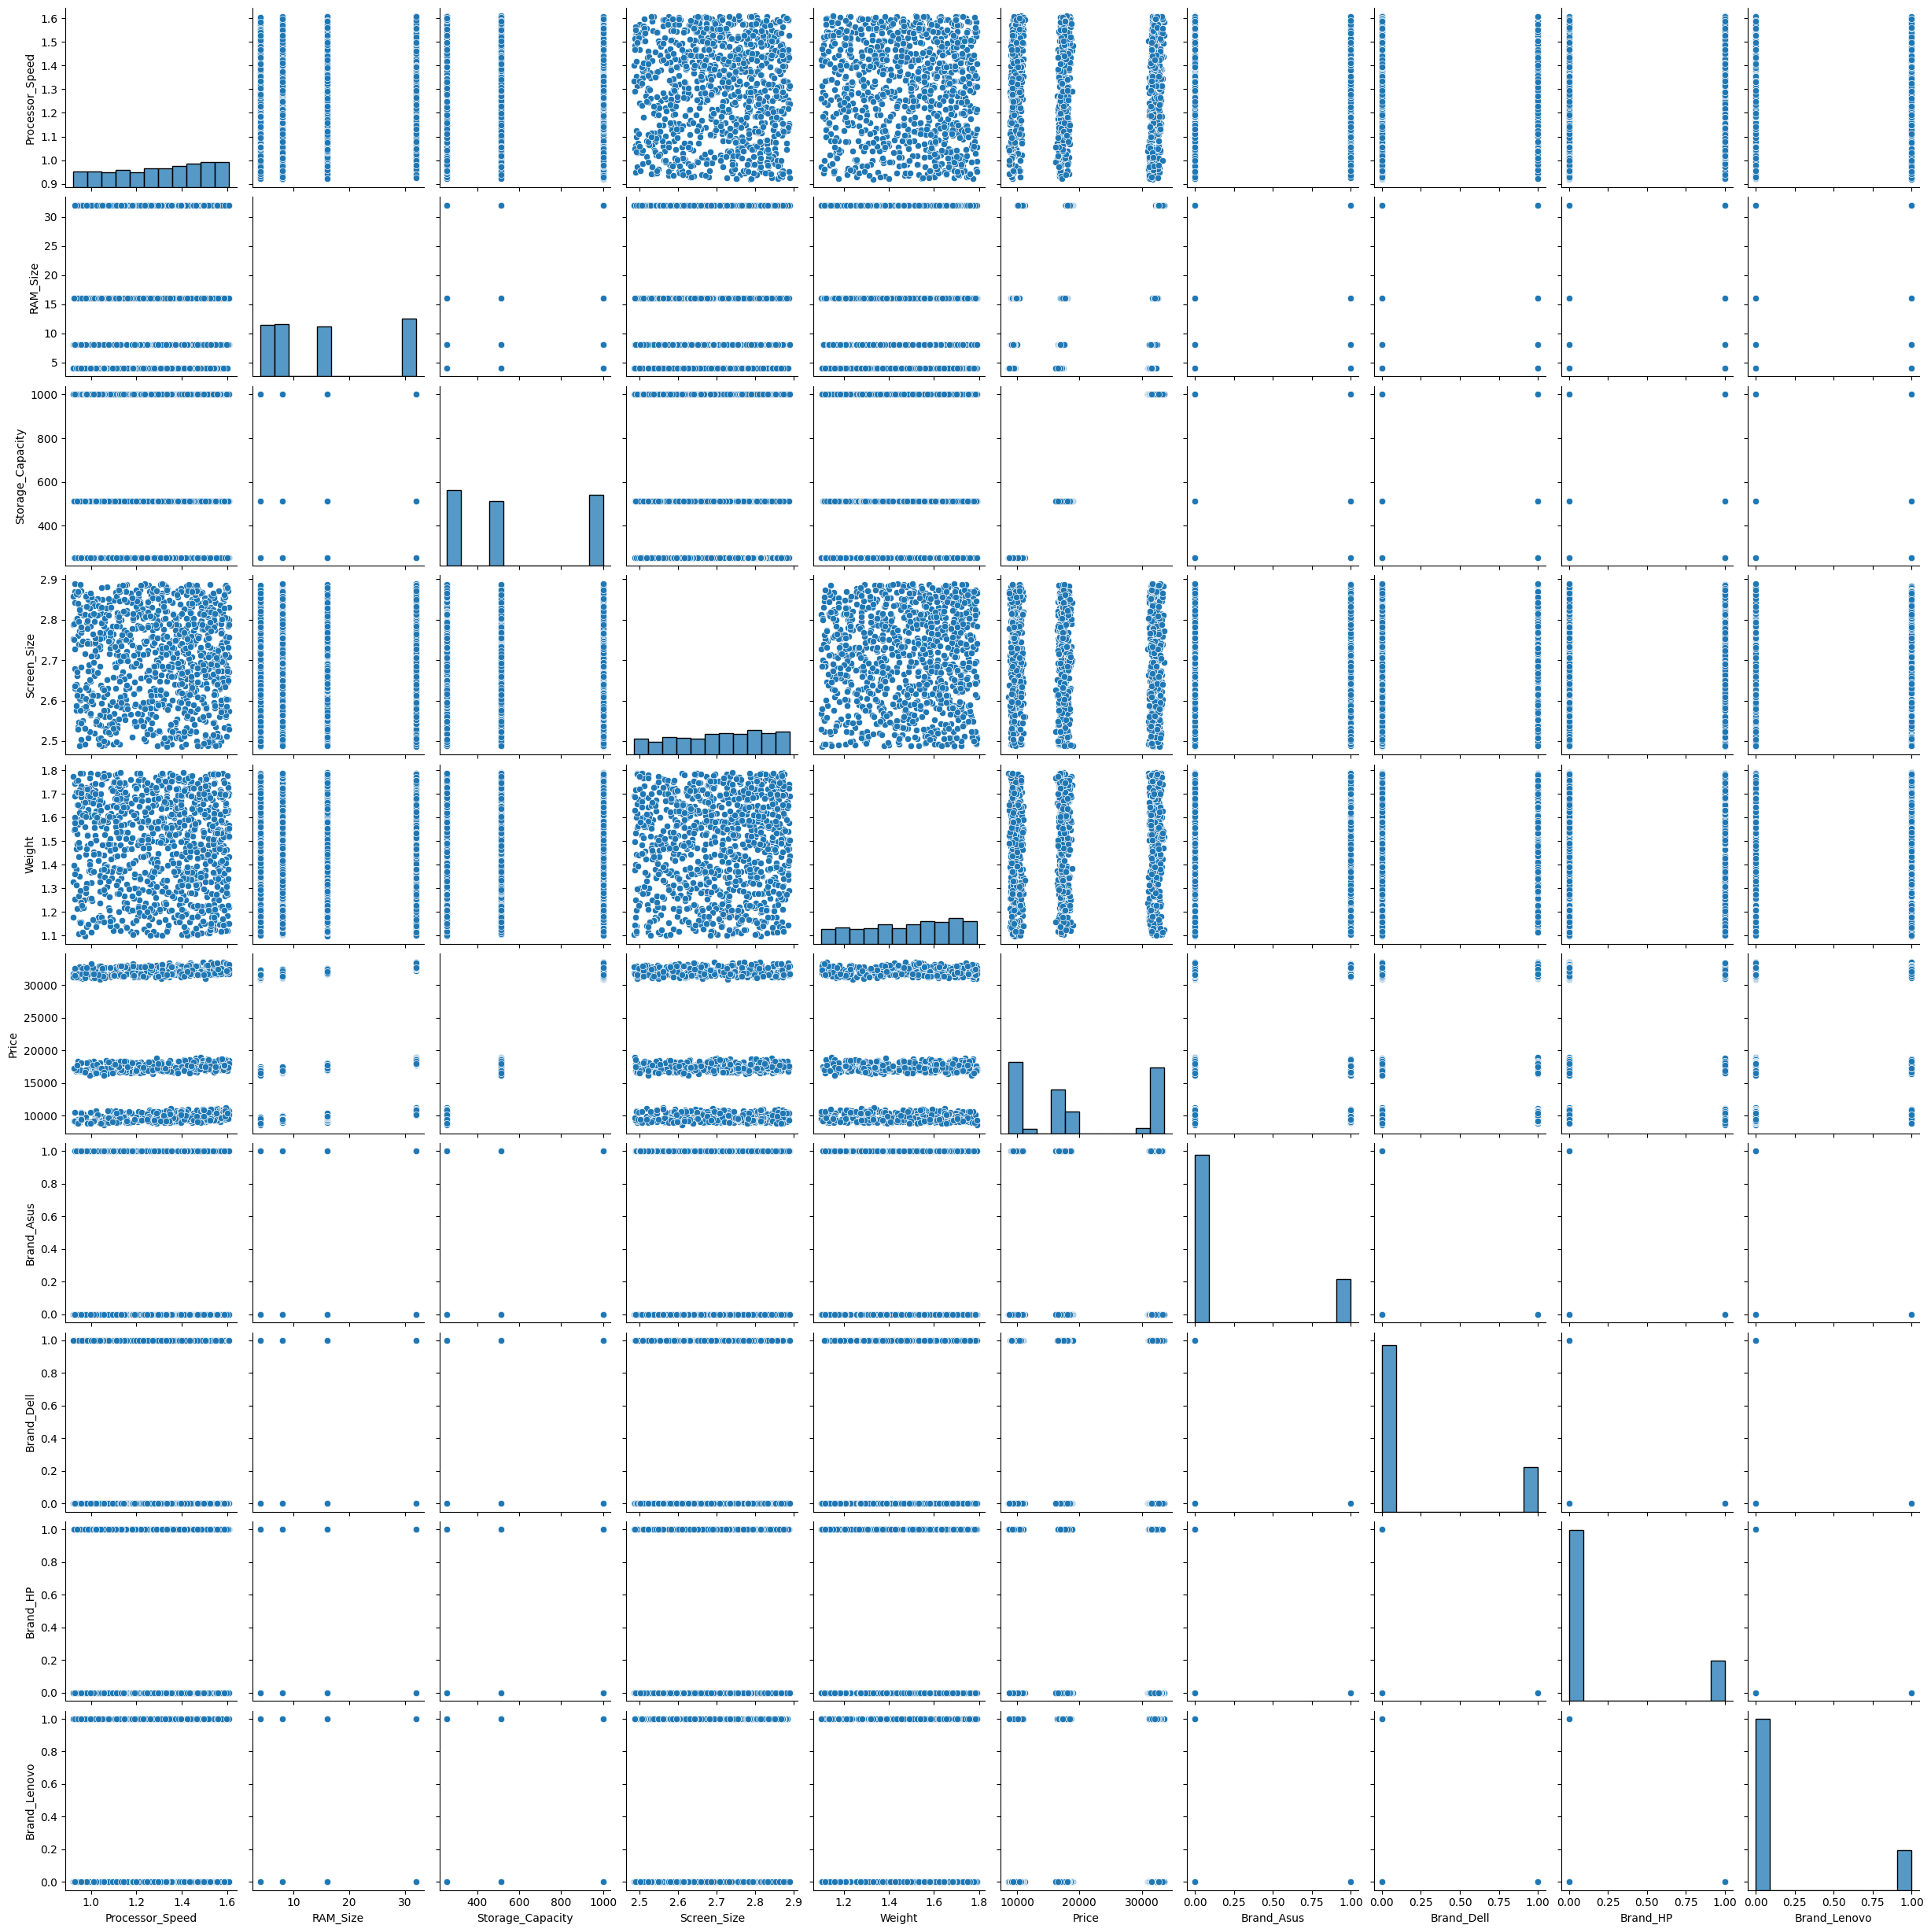

In [11]:
sns.pairplot(profile_data)

### **Check for Outliners**

In [12]:
def boxPlot(data, col):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.histplot(data[col],ax=ax1, kde=True)
    sns.boxplot(data[col],orient="h",ax=ax2)

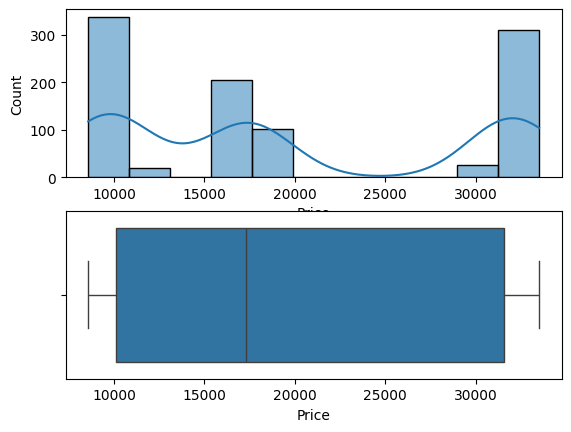

In [13]:
boxPlot(profile_data,'Price')

<Axes: >

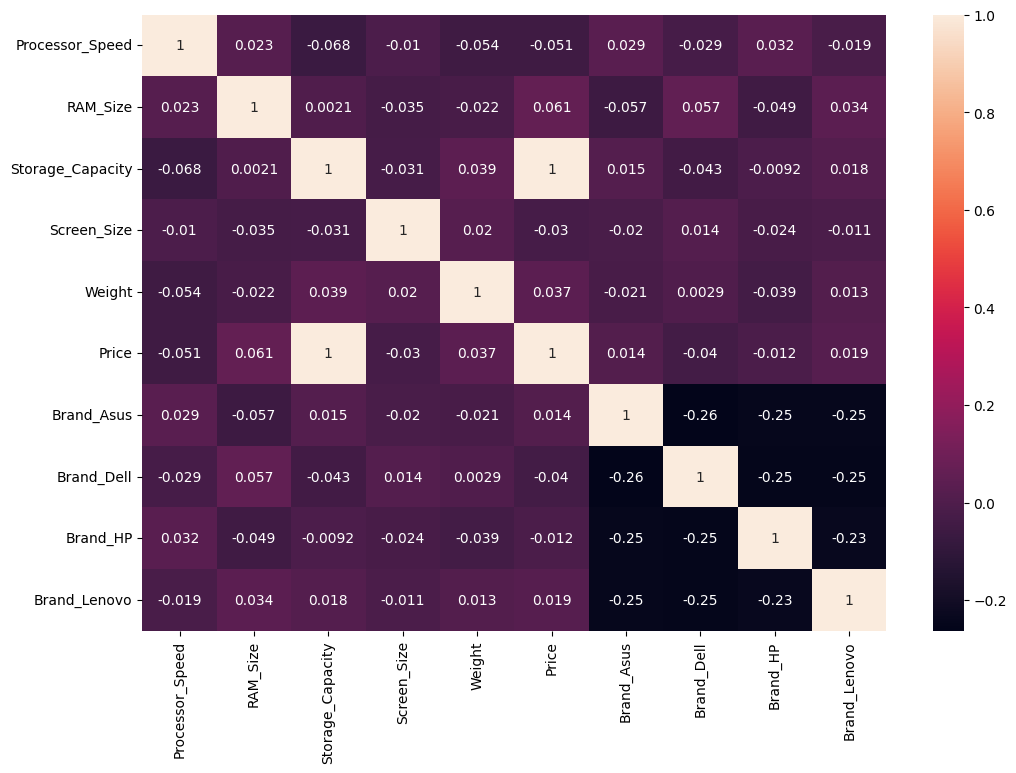

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(profile_data.corr(), annot=True)